<a href="https://colab.research.google.com/github/SHOBHEY/AVINASH/blob/main/Markov_chain_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simulation on Financial conditions**

1. State Simulation

In [1]:
import numpy as np

def simulate_financial_market(P, u, N):
    """
    Simulates a financial market using a Markov chain of length N.

    Parameters:
    - P: Transition probability matrix (3x3 for Bull, Bear, and Stagnant).
    - u: Initial distribution vector ([P(Bull), P(Bear), P(Stagnant)]).
    - N: Length of the Markov chain.

    Returns:
    - chain: List of states in the financial market (1 = Bull, 2 = Bear, 3 = Stagnant).
    """
    states = ['Bull', 'Bear', 'Stagnant']  # Labels for the states
    chain = []

    # Step 1: Generate the initial state
    U0 = np.random.uniform(0, 1)
    cumulative_u = np.cumsum(u)
    initial_state = np.where(U0 < cumulative_u)[0][0]
    chain.append(initial_state)

    # Step 2: Simulate transitions
    for _ in range(N - 1):
        current_state = chain[-1]
        U_next = np.random.uniform(0, 1)
        cumulative_p = np.cumsum(P[current_state])
        next_state = np.where(U_next < cumulative_p)[0][0]
        chain.append(next_state)

    # Convert state indices to labels
    labeled_chain = [states[state] for state in chain]
    return labeled_chain

# Example Usage
P = np.array([
    [0.6, 0.3, 0.1],  # Bull to Bull, Bear, Stagnant
    [0.2, 0.7, 0.1],  # Bear to Bull, Bear, Stagnant
    [0.3, 0.3, 0.4]   # Stagnant to Bull, Bear, Stagnant
])
u = [0.5, 0.1, 0.4]  # Initial probabilities for Bull, Bear, Stagnant
N = 300  # Length of the simulation

simulated_states = simulate_financial_market(P, u, N)
print("Simulated Financial Market States:", simulated_states)



Simulated Financial Market States: ['Stagnant', 'Bull', 'Bull', 'Bull', 'Bear', 'Bear', 'Stagnant', 'Bull', 'Bull', 'Stagnant', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bear', 'Bear', 'Bear', 'Bear', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bear', 'Bear', 'Bear', 'Bear', 'Stagnant', 'Bear', 'Bear', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bear', 'Bull', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bull', 'Bear', 'Bear', 'Bear', 'Stagnant', 'Stagnant', 'Bear', 'Bear', 'Bear', 'Bull', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bull', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bull', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Stagnant', 'Bear', 'Bear', 'Stagnant', 'Stagnant', 'Stagnant', 'Bull', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bull', 'Bear', 'Bear', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Stagnant', 'Bull', 'Bear', 'Bear', 'Stagnant', 'Bear', 'Bear', 'Bull', 'Bull', 'Bull', 'Bull', 'Bear', 'Bull', 'Sta

2. Empirical Transition Probability Matrix

In [2]:
import numpy as np
import pandas as pd
from collections import defaultdict

def calculate_empirical_tpm(chain, states):
    """
    Calculates the Empirical Transition Probability Matrix (ETPM) from a simulated Markov chain.

    Parameters:
    - chain: List of states in the simulated Markov chain.
    - states: List of unique state labels (e.g., ['Bull', 'Bear', 'Stagnant']).

    Returns:
    - ETPM: Pandas DataFrame representing the empirical transition probabilities.
    """
    num_states = len(states)
    state_index = {state: i for i, state in enumerate(states)}  # Map state labels to indices
    transition_counts = np.zeros((num_states, num_states))

    # Count transitions
    for i in range(len(chain) - 1):
        current_state = state_index[chain[i]]
        next_state = state_index[chain[i + 1]]
        transition_counts[current_state, next_state] += 1

    # Calculate empirical probabilities
    ETPM = np.zeros((num_states, num_states))
    for i in range(num_states):
        row_sum = np.sum(transition_counts[i])
        if row_sum > 0:
            ETPM[i] = transition_counts[i] / row_sum

    # Convert to DataFrame for better readability
    ETPM_df = pd.DataFrame(ETPM, index=states, columns=states)
    return ETPM_df

# Example usage
states = ['Bull', 'Bear', 'Stagnant']
etpm = calculate_empirical_tpm(simulated_states, states)
print("Empirical Transition Probability Matrix (ETPM):")
print(etpm)

Empirical Transition Probability Matrix (ETPM):
              Bull      Bear  Stagnant
Bull      0.588785  0.336449  0.074766
Bear      0.194805  0.707792  0.097403
Stagnant  0.368421  0.263158  0.368421


# **Simulation on Machine conditions**

In [3]:
import numpy as np
import pandas as pd
from collections import defaultdict

def simulate_markov_chain(P, u, N):
    """
    Simulates a Markov chain of length N for the machine model.

    Parameters:
    - P: Transition probability matrix (2x2).
    - u: Initial distribution vector (length 2).
    - N: Length of the Markov chain.

    Returns:
    - chain: List of states in the Markov chain.
    """
    k = len(u)  # Number of states (2 states: working, not working)
    chain = []

    # Step 1: Generate the initial state
    U0 = np.random.uniform(0, 1)
    cumulative_u = np.cumsum(u)
    X0 = np.where(U0 < cumulative_u)[0][0]
    chain.append(X0)

    # Step 2: Simulate transitions
    for _ in range(N - 1):
        current_state = chain[-1]
        U_next = np.random.uniform(0, 1)
        cumulative_p = np.cumsum(P[current_state])
        next_state = np.where(U_next < cumulative_p)[0][0]
        chain.append(next_state)

    return chain

def calculate_empirical_tpm(chain, states):
    """
    Calculates the Empirical Transition Probability Matrix (ETPM) from a simulated Markov chain.

    Parameters:
    - chain: List of states in the simulated Markov chain.
    - states: List of unique state labels (e.g., ['Working', 'Not Working']).

    Returns:
    - ETPM: Pandas DataFrame representing the empirical transition probabilities.
    """
    num_states = len(states)
    transition_counts = np.zeros((num_states, num_states))

    # Count transitions
    for i in range(len(chain) - 1):
        current_state = chain[i]
        next_state = chain[i + 1]
        transition_counts[current_state, next_state] += 1

    # Calculate empirical probabilities
    ETPM = np.zeros((num_states, num_states))
    for i in range(num_states):
        row_sum = np.sum(transition_counts[i])
        if row_sum > 0:
            ETPM[i] = transition_counts[i] / row_sum

    # Convert to DataFrame for better readability
    ETPM_df = pd.DataFrame(ETPM, index=states, columns=states)
    return ETPM_df

# Example usage
P = np.array([[0.8, 0.2],
              [0.3, 0.7]])
u = [0.5, 0.5]  # Initial distribution (50% chance for each state)
N = 100  # Number of steps

# Simulate the Markov chain for the machine model
simulated_states = simulate_markov_chain(P, u, N)
print("Simulated Machine States:", simulated_states)

# Calculate and print the Empirical Transition Probability Matrix (ETPM)
states = ['Working', 'Not Working']  # State labels
etpm = calculate_empirical_tpm(simulated_states, states)
print("\nEmpirical Transition Probability Matrix (ETPM):")
print(etpm)

Simulated Machine States: [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0]

Empirical Transition Probability Matrix (ETPM):
              Working  Not Working
Working      0.781818     0.218182
Not Working  0.295455     0.704545


# **Simulation on Weather conditions**

In [4]:
import numpy as np
import pandas as pd
from collections import defaultdict

# Step 1: Simulating the Weather Model
def simulate_weather_model(P, u, N):
    """
    Simulates the weather model using a Markov chain.

    Parameters:
    - P: Transition probability matrix (3x3).
    - u: Initial distribution vector (length 3).
    - N: Length of the Markov chain (number of steps).

    Returns:
    - chain: List of states in the Markov chain representing the weather.
    """
    k = len(u)  # Number of states (3: Sunny, Rainy, Winter)
    chain = []

    # Step 1: Generate the initial state
    U0 = np.random.uniform(0, 1)
    cumulative_u = np.cumsum(u)
    X0 = np.where(U0 < cumulative_u)[0][0]  # Initial state: 0 (Sunny), 1 (Rainy), or 2 (Winter)
    chain.append(X0)

    # Step 2: Simulate transitions
    for _ in range(N - 1):
        current_state = chain[-1]
        U_next = np.random.uniform(0, 1)
        cumulative_p = np.cumsum(P[current_state])
        next_state = np.where(U_next < cumulative_p)[0][0]  # Next state: 0 (Sunny), 1 (Rainy), 2 (Winter)
        chain.append(next_state)

    return chain


# Step 2: Calculate Empirical Transition Probability Matrix (ETPM)
def infer_empirical_tpm(simulated_chain):
    """
    Infers the Empirical Transition Probability Matrix (ETPM) from observed states.

    Parameters:
    - simulated_chain: Sequence of observed states.

    Returns:
    - pd.DataFrame: Empirical TPM.
    """
    # Step 1: Identify unique states
    unique_states = sorted(list(set(simulated_chain)))

    # Step 2: Count transitions
    transition_counts = defaultdict(lambda: defaultdict(int))
    for (current_state, next_state) in zip(simulated_chain[:-1], simulated_chain[1:]):
        transition_counts[current_state][next_state] += 1

    # Convert counts to DataFrame
    transition_df = pd.DataFrame(transition_counts).fillna(0).astype(int)

    # Step 3: Calculate TPM
    TPM = pd.DataFrame(columns=unique_states, index=unique_states).fillna(0.0)
    for state in unique_states:
        total_transitions = sum(transition_counts[state].values())
        if total_transitions > 0:
            for next_state in unique_states:
                TPM.loc[state, next_state] = transition_counts[state][next_state] / total_transitions
        else:
            # If no outgoing transitions, assign equal probabilities
            TPM.loc[state] = 1.0 / len(unique_states)

    return TPM


# Example usage for the Weather Model simulation
P = np.array([
    [0.6, 0.3, 0.1],  # Sunny (0): 60% Sunny, 30% Rainy, 10% Winter
    [0.5, 0.4, 0.1],  # Rainy (1): 50% Sunny, 40% Rainy, 10% Winter
    [0.3, 0.2, 0.5],  # Winter (2): 30% Sunny, 20% Rainy, 50% Winter
])

u = [0.5, 0.3, 0.2]  # Initial distribution: 50% Sunny, 30% Rainy, 20% Winter
N = 1000  # Number of steps in the Markov chain

# Simulate the weather states
simulated_weather = simulate_weather_model(P, u, N)
print("Simulated Weather States:", simulated_weather)

# Infer the Empirical Transition Probability Matrix (ETPM)
empirical_TPM = infer_empirical_tpm(simulated_weather)
print("\nEmpirical Transition Probability Matrix (ETPM):")
print(empirical_TPM)

Simulated Weather States: [2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 1, 1, 1, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 2, 2, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 2, 0, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 0, 1, 2, 1, 1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 1, 0, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 2, 1, 0, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 2, 2, 0, 2, 2, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 0, 0

<ipython-input-4-70cc758723c6>:61: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  TPM = pd.DataFrame(columns=unique_states, index=unique_states).fillna(0.0)


# **Convergence of Empirical Distribution**

Empirical distribution after 10 steps: [0.2 0.6 0.2]
Empirical distribution after 50 steps: [0.48 0.42 0.1 ]
Empirical distribution after 100 steps: [0.43 0.46 0.11]
Empirical distribution after 500 steps: [0.42  0.444 0.136]
Empirical distribution after 1000 steps: [0.373 0.48  0.147]


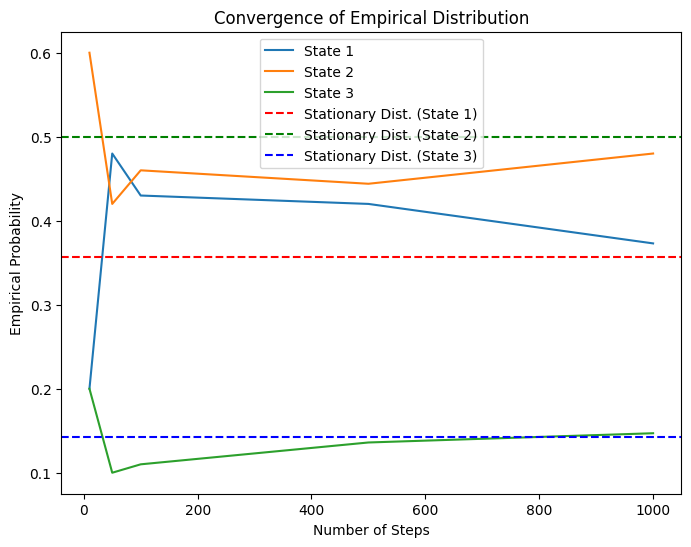

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_markov_chain(u, P, N):
    states = np.arange(len(u))
    current_state = np.random.choice(states, p=u)
    simulated_chain = [current_state]
    for _ in range(N - 1):
        current_state = np.random.choice(states, p=P[current_state])
        simulated_chain.append(current_state)
    return simulated_chain

def empirical_distribution(simulated_chain, num_states):
    counts = np.zeros(num_states)
    for state in simulated_chain:
        counts[state] += 1
    return counts / len(simulated_chain)

# Parameters
u = [0.5, 0.1, 0.4]  # Initial distribution
P = [[0.6, 0.3, 0.1],
     [0.2, 0.7, 0.1],
     [0.3, 0.3, 0.4]]  # TPM
N = 1000  # Length of the chain

# Simulate Markov chain
simulated_chain = simulate_markov_chain(u, P, N)

# Compute empirical distribution at different steps
empirical_distributions = []
steps = [10, 50, 100, 500, 1000]
for step in steps:
    empirical_distributions.append(empirical_distribution(simulated_chain[:step], len(u)))

# Display results
for i, dist in zip(steps, empirical_distributions):
    print(f"Empirical distribution after {i} steps: {dist}")

# Plotting convergence
stationary_distribution = np.linalg.matrix_power(P, 1000)[0]  # Approximation
plt.figure(figsize=(8, 6))
for i in range(len(u)):
    plt.plot(steps, [dist[i] for dist in empirical_distributions], label=f"State {i+1}")
plt.axhline(y=stationary_distribution[0], color='r', linestyle='--', label="Stationary Dist. (State 1)")
plt.axhline(y=stationary_distribution[1], color='g', linestyle='--', label="Stationary Dist. (State 2)")
plt.axhline(y=stationary_distribution[2], color='b', linestyle='--', label="Stationary Dist. (State 3)")
plt.xlabel("Number of Steps")
plt.ylabel("Empirical Probability")
plt.title("Convergence of Empirical Distribution")
plt.legend()
plt.show()

# **Verifying Stationary Distribution**

In [6]:
import numpy as np

def check_stationary_distribution(pi, P, tolerance=1e-6):
    """
    Verifies if pi is a stationary distribution for the given TPM P.

    Parameters:
        pi (np.array): Candidate stationary distribution.
        P (2D np.array): Transition Probability Matrix (TPM).
        tolerance (float): Numerical tolerance for equality check.

    Returns:
        bool: True if pi is a stationary distribution, False otherwise.
    """
    # Compute pi * P
    pi_dot_P = np.dot(pi, P)

    # Check if pi * P is approximately equal to pi
    return np.allclose(pi_dot_P, pi, atol=tolerance), pi_dot_P

# Transition Probability Matrix
P = np.array([
    [0.6, 0.3, 0.1],
    [0.2, 0.7, 0.1],
    [0.3, 0.3, 0.4]
])

# Revised stationary distribution
pi = np.array([0.35714286, 0.5, 0.14285714])

# Check if pi satisfies pi = pi * P
is_stationary, pi_dot_P = check_stationary_distribution(pi, P)
print("Is pi a stationary distribution?", is_stationary)
print("Computed value of pi * P:", pi_dot_P)

Is pi a stationary distribution? True
Computed value of pi * P: [0.35714286 0.5        0.14285714]
